<a href="https://colab.research.google.com/github/dishankkalra23/Medical-Appointment-No-Shows/blob/main/Medical_Appointment_No_Shows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Medical Appointment No Shows

>[Project: Medical Appointment No Shows](#scrollTo=BmfbjWRNOPeO)

>>>[Importing Libraries](#scrollTo=zy3dSfeNPPCc)

>>>[Downloading dataset](#scrollTo=by5KNcWYVbXS)

>>>[Loading dataset](#scrollTo=N14ODJZWXEZd)

>[Data Wrangling](#scrollTo=zzG5_tl6_OJF)

>>[Making new column Scheduled time](#scrollTo=kislWLDHJly8)

>>[Rename columns](#scrollTo=HaJI_xlfgW12)

>>[Changing no_show(to show) column to avoid misconception and easily understandable](#scrollTo=FHgwFcz7kNr4)

>>[TO BE CHECKED: handicap and sms_received](#scrollTo=Cq1jFItJpjz8)

>>[Appointment day(day on which pateint has to visit doctor) is before Scheduled Day](#scrollTo=TVfMxC9B8vOC)

>>[Duplicates in data](#scrollTo=KLgc2zuUrD_9)

>[Exploratory Data Analysis](#scrollTo=rMEMqZ45HXKF)

>>>[Descriptive statistics](#scrollTo=m9SF62eI4sAD)

>>>[Correlation b/w columns of dataset](#scrollTo=67sSwwka4l20)

>>[Gender](#scrollTo=WcgzTUpVHeBB)

>>>[No of males and females that showed up at appointment](#scrollTo=doajAKAP26Mk)

>>>[Total number of males and females in dataset](#scrollTo=tHoAOmv-3JX0)

>>>[Proportion of male and female patients](#scrollTo=VCkc-mqi3amn)

>>>[Proportion of male and female patients to show up for scheduled appointment](#scrollTo=25FL_9Ak3ixH)

>>>[Converting males and femlaes to quantative variable to find correlation with other features in dataset](#scrollTo=Vvf1k8jF6sFU)

>>>[Function to find relationship b/w gender and different features](#scrollTo=Bo37oz8VR6jn)

>>>[Relation of showing up wrt gender and alcoholism](#scrollTo=7_wdoUDOR3z6)

>[TO DO: Check padding b/w yticks and ylabels](#scrollTo=j71ydFZrxGGQ)

>>>[Relation of showing up wrt gender and diabetes](#scrollTo=tEShAcy__WCg)

>>>[Relation of showing up wrt gender and hypertension](#scrollTo=Wcqb-5dXJAmG)

>>>[Relation of showing up wrt gender and scholarship](#scrollTo=woarzFt3Rsu7)

>[Limitations](#scrollTo=6QdaSperKHOb)



### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Downloading dataset

In [2]:
! pip install -q kaggle

In [ ]:
# Upload your kaggle.json file containing API token
from google.colab import files
files.upload()

In [4]:
# Move the downloaded file to a location ~/.kaggle/kaggle.json
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

# You need to give proper permissions to the file (since this is a hidden folder)
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
# Copy API command to download dataset
! kaggle datasets download -d joniarroba/noshowappointments
! unzip \*.zip
! rm *.zip

  0% 0.00/2.40M [00:00<?, ?B/s]
100% 2.40M/2.40M [00:00<00:00, 80.6MB/s]
Archive:  noshowappointments.zip
  inflating: KaggleV2-May-2016.csv   


### Loading dataset

In [6]:
df = pd.read_csv('/content/KaggleV2-May-2016.csv')

In [7]:
df.sample(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
98235,6.793654e+14,5697500,F,2016-05-13T16:12:56Z,2016-06-01T00:00:00Z,4,JABOUR,0,0,0,0,0,1,Yes
38870,9.571165e+13,5611876,M,2016-04-25T07:41:55Z,2016-05-18T00:00:00Z,51,SANTA TEREZA,0,0,0,1,0,0,No
80941,3.118989e+13,5650253,F,2016-05-03T07:33:59Z,2016-05-05T00:00:00Z,89,ILHA DO PRÍNCIPE,0,1,0,0,2,0,Yes
87652,9.125184e+11,5730757,M,2016-05-24T09:05:30Z,2016-06-06T00:00:00Z,18,SANTA MARTHA,1,0,0,0,0,1,No
12250,9.115338e+13,5623021,F,2016-04-26T13:25:41Z,2016-05-03T00:00:00Z,31,MONTE BELO,0,0,0,0,0,1,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> 

> No missing values in data

> **Data type of columns to be fixed,**
1. PatientId is the unique id for identification of a patient and float datatype doesn't make sense.
2. ScheduledDay and AppointmentDay can be used in analysis if we convert them into date-time format.


# Data Wrangling

In [9]:
df.PatientId = df.PatientId.astype('int')
df.PatientId.dtypes

dtype('int64')

In [10]:
df.ScheduledDay = pd.to_datetime(df.ScheduledDay)
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)
df[['ScheduledDay','AppointmentDay']].dtypes

ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
dtype: object

## Making new column Scheduled time 
> Converting ScheduleDate & AppointmentDate column to store dates and ScheduledTime & AppointmentTime to  store time of appointment

In [11]:
df['ScheduledTime'] = pd.to_datetime(df.ScheduledDay).dt.time
df['AppointmentTime'] = pd.to_datetime(df.AppointmentDay).dt.time

In [12]:
df['ScheduledDay'] = df['ScheduledDay'].dt.date
df['AppointmentDay'] = df['AppointmentDay'].dt.date

In [13]:
df.AppointmentTime.sample(5)

50678    00:00:00
58561    00:00:00
3087     00:00:00
87599    00:00:00
56228    00:00:00
Name: AppointmentTime, dtype: object

In [14]:
df.AppointmentTime.nunique()

1

> Appointment Time is 00:00:00 in all the rows, it is not relevant to analysis. Hence dropping AppointmentTime column 

In [15]:
df.drop(columns='AppointmentTime',inplace=True)
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'ScheduledTime'],
      dtype='object')

In [16]:
df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

> Age can never be negative, removing rows which have age less than 0

In [17]:
df_less_0 = df.query('Age < 0')
df_less_0.Age.count()

1

> Only single row with age less than 0

In [18]:
df = df.query('Age >= 0')

## Rename columns

In [19]:
labels = {'PatientId':"patient_id", 'AppointmentID':'appointment_id', 'Gender':'gender', 
        'ScheduledDay':'scheduled_day',
       'AppointmentDay':'appointment_day', 'Age':'age', 'Neighbourhood':'neighbourhood', 
       'Scholarship':'scholarship', 'Hipertension':'hypertension',
       'Diabetes':'diabetes', 'Alcoholism':'alcoholism', 'Handcap':'handicap', 
       'SMS_received':'sms_received', 'No-show':'show',
       'ScheduledTime':'scheduled_time'}
df.rename(columns=labels,inplace=True)

In [20]:
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'show', 'scheduled_time'],
      dtype='object')

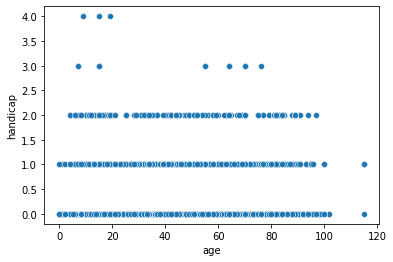

In [126]:
sns.scatterplot(data=df,x='age',y='handicap')

## Changing no_show(to show) column to avoid misconception and easily understandable

Substituting Yes with 0 and No with 1

In [ ]:
df.show = df.show.map({'Yes':0,'No':1})
df.show.astype(int)

## TO BE CHECKED: handicap and sms_received

 

In [22]:
handicap_patients = df.query("handicap > 0").handicap.count()
total_patients = df.handicap.count()
handicap_patients/total_patients

0.020275772216492047

In [23]:
got_sms = df.query("sms_received == 1").sms_received.count()
total_patients = df.sms_received.count()
got_sms/total_patients

0.3210285362720084

## Appointment day(day on which pateint has to visit doctor) is before Scheduled Day

In [24]:
df_error = df[df.scheduled_day > df.appointment_day ][['patient_id','appointment_id','scheduled_day','appointment_day','show']]
df_error

,patient_id,appointment_id,scheduled_day,appointment_day,show
27033,7839272661752,5679978,2016-05-10,2016-05-09,0
55226,7896293967868,5715660,2016-05-18,2016-05-17,0
64175,24252258389979,5664962,2016-05-05,2016-05-04,0
71533,998231581612122,5686628,2016-05-11,2016-05-05,0
72362,3787481966821,5655637,2016-05-04,2016-05-03,0


> In the first row, appointment day is **9th May** and scheduled day is **10th May** which doesn't make any sense. So, dropping rows where appointment day is before scheduled day

In [25]:
print('Number of rows with appointment day before scheduled day:',df_error.patient_id.count())

Number of rows with appointment day before scheduled day: 5


In [26]:
print('Number of rows before dropping above rows:', df.patient_id.count())

Number of rows before dropping above rows: 110526


In [27]:
df = df[df.scheduled_day <= df.appointment_day ]
print('Number of rows after dropping above rows:', df.patient_id.count())

Number of rows after dropping above rows: 110521


## Duplicates in data

In [28]:
df.duplicated().sum()

0

> No duplicate rows in data

<a id='eda'></a>
# Exploratory Data Analysis

### Descriptive statistics

In [29]:
df.describe().iloc[2:,2:]

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
std,23.109885,0.297682,0.397929,0.258272,0.17169,0.161494,0.466879,0.401419
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.00000,4.000000,1.000000,1.000000


### Correlation b/w columns of dataset

In [30]:
df.corr().iloc[2:,2:]

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
age,1.000000,-0.092469,0.504599,0.292398,0.095811,0.078101,0.012629,0.060320
scholarship,-0.092469,1.000000,-0.019738,-0.024899,0.035019,-0.008555,0.001182,-0.029166
hypertension,0.504599,-0.019738,1.000000,0.433082,0.087967,0.080162,-0.006285,0.035662
diabetes,0.292398,-0.024899,0.433082,1.000000,0.018471,0.057578,-0.014561,0.015158
alcoholism,0.095811,0.035019,0.087967,0.018471,1.000000,0.004668,-0.026154,0.000181
handicap,0.078101,-0.008555,0.080162,0.057578,0.004668,1.000000,-0.024097,0.006290
sms_received,0.012629,0.001182,-0.006285,-0.014561,-0.026154,-0.024097,1.000000,-0.126502
show,0.060320,-0.029166,0.035662,0.015158,0.000181,0.006290,-0.126502,1.000000


## Gender

### No of males and females that showed up at appointment

In [31]:
gender_show = df.groupby('gender').show.sum()
gender_show

gender
F    57245
M    30962
Name: show, dtype: int64

### Total number of males and females in dataset

In [32]:
gender_total = df.groupby('gender').patient_id.count()
gender_total

gender
F    71836
M    38685
Name: patient_id, dtype: int64

### Proportion of male and female patients

In [33]:
prop_female_patients = gender_total.F/(gender_total.F + gender_total.M)*100
prop_female_patients

64.99760226563278

In [34]:
prop_male_patients = gender_total.M/(gender_total.F + gender_total.M)*100
prop_male_patients

35.00239773436722

In [35]:
def horizontal_bars(name,prop,title):
  fig, ax = plt.subplots(figsize =(10, 5))
  ax.barh(name, prop)

  # To add grid
  ax.grid(b = True, color ='grey',
          linestyle ='-.', linewidth = 0.5,
          alpha = 0.2)

  # To remove axes
  for s in ['top', 'bottom', 'left', 'right']:
      ax.spines[s].set_visible(False)

  # To remove x and y ticks
  ax.xaxis.set_ticks_position('none')
  ax.yaxis.set_ticks_position('none')

  plt.xticks(fontsize=10)
  plt.yticks(fontsize=12)

  # Add padding between axes and labels
  ax.xaxis.set_tick_params(pad = 5)
  ax.yaxis.set_tick_params(pad = 15)

  plt.xlabel('\n\nPercentage of Patients',fontsize=12)
  plt.ylabel('Gender',fontsize=12)
  ax.set_title(title,fontsize = 15 )

  for i in ax.patches:
      plt.text(i.get_width()+0.01, i.get_y()+0.4,
              str(round((i.get_width()), 2)),
              fontsize = 12, fontweight ='bold',
              color ='grey')
      
  plt.show()

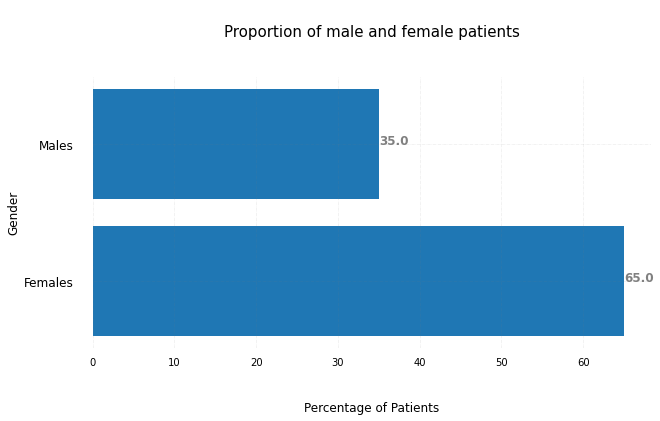

In [36]:
gend = ['Females','Males']
prop = [prop_female_patients,prop_male_patients]
title = '\nProportion of male and female patients\n\n'
horizontal_bars(gend,prop,title)

### Proportion of male and female patients to show up for scheduled appointment

In [37]:
prop_female_show = (gender_show.F/gender_total.F)*100
prop_female_show

79.68845704103792

In [38]:
prop_male_show = (gender_show.M/gender_total.M)*100
prop_male_show

80.0361897376244

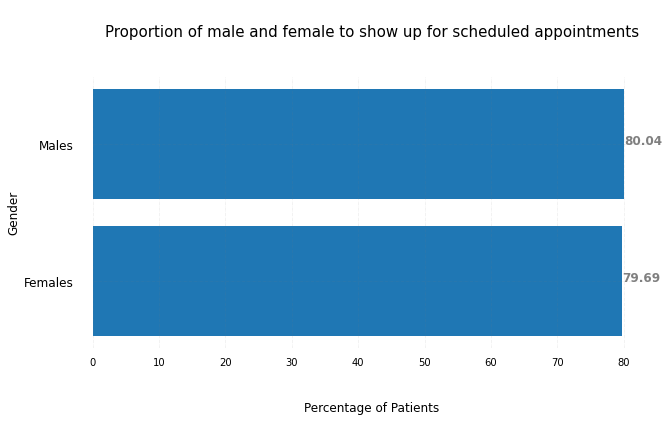

In [39]:
gend = ['Females','Males']
prop = [prop_female_show,prop_male_show]
title = '\nProportion of male and female to show up for scheduled appointments\n\n'

horizontal_bars(gend,prop,title)

### Converting males and femlaes to quantative variable to find correlation with other features in dataset

In [57]:
df_new = df.copy()
df_new.gender = df_new.gender.map({'F':1,'M':0})
df_new.corr().iloc[2:,2:]

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
gender,1.000000,0.106439,0.114297,0.055721,0.032555,-0.106170,-0.022787,0.046301,-0.004132
age,0.106439,1.000000,-0.092469,0.504599,0.292398,0.095811,0.078101,0.012629,0.060320
scholarship,0.114297,-0.092469,1.000000,-0.019738,-0.024899,0.035019,-0.008555,0.001182,-0.029166
hypertension,0.055721,0.504599,-0.019738,1.000000,0.433082,0.087967,0.080162,-0.006285,0.035662
diabetes,0.032555,0.292398,-0.024899,0.433082,1.000000,0.018471,0.057578,-0.014561,0.015158
alcoholism,-0.106170,0.095811,0.035019,0.087967,0.018471,1.000000,0.004668,-0.026154,0.000181
handicap,-0.022787,0.078101,-0.008555,0.080162,0.057578,0.004668,1.000000,-0.024097,0.006290
sms_received,0.046301,0.012629,0.001182,-0.006285,-0.014561,-0.026154,-0.024097,1.000000,-0.126502
show,-0.004132,0.060320,-0.029166,0.035662,0.015158,0.000181,0.006290,-0.126502,1.000000


> There is no direct relation of gender with any other feature 

### Function to find relationship b/w gender and different features

In [298]:
def rel_with_gender(_feature,_title):
  extracted_df = pd.pivot_table(data=df,index=['gender',_feature],values='show')
  extracted_df.show = extracted_df.show*100
  extracted_df.reset_index(inplace=True)

  # To set figure size 
  plt.figure(figsize=(8,6),dpi=70)
  
  # To make bar plot
  graph = sns.barplot(data=extracted_df,x='gender',y='show',hue=_feature);

  # To add padding b/w axis and ticks
  graph.xaxis.set_tick_params(pad = 10)
  graph.yaxis.set_tick_params(pad = 3)

  graph.set_xlabel('Gender',fontsize=13)
  graph.set_ylabel('% of people who showed up',fontsize=13)
  graph.set_title(_title,fontsize=16)
  graph.set_xticklabels(['Females','Males'],fontsize=11.5)

  # To set y-axis limits
  graph.set_ylim(0,90)

  # To place legend outside top right corner of plot
  plt.legend(title='Consume Alcohol',bbox_to_anchor=(1.02, 0.5), loc='upper left', borderaxespad=0)
  # plt.legend(title='Consume Alcohol',bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,labels=['No','Yes'])
  # plt.legend(title='Alcoholism',labels=['A', 'A'], loc='upper left')

  # To remove spines 
  sns.despine( left=True, bottom=True)

  # TO DO: Add padding between axes and labels
   
  plt.show(graph)


### Relation of showing up wrt gender and alcoholism 

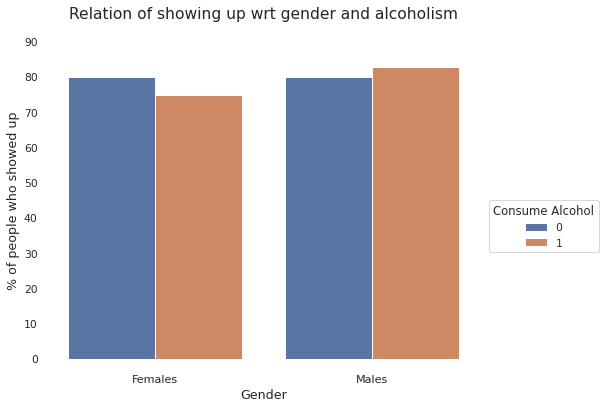

In [299]:
rel_with_gender(_feature='alcoholism',_title='Relation of showing up wrt gender and alcoholism\n')

# TO DO: Check padding b/w yticks and ylabels 

In [150]:
gender_alcohol = pd.pivot_table(data=df,index=['gender','alcoholism'],values='show')
gender_alcohol.show = gender_alcohol.show*100

In [151]:
gender_alcohol.reset_index(inplace=True)

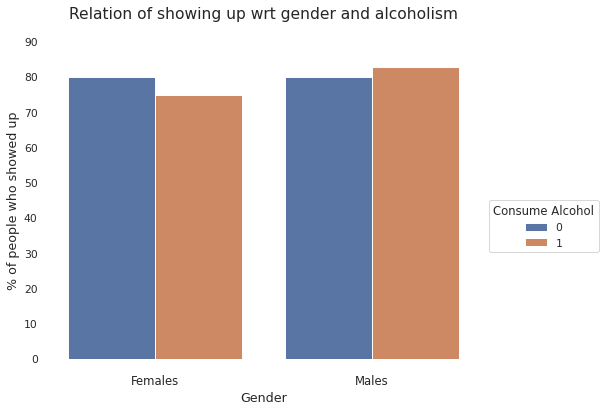

In [287]:
plt.figure(figsize=(8,6),dpi=70)
a = sns.barplot(data=gender_alcohol,x='gender',y='show',hue='alcoholism');

# To 
a.xaxis.set_tick_params(pad = 10)
a.yaxis.set_tick_params(pad = 3)

a.set_xlabel('Gender',fontsize=13)
a.set_ylabel('% of people who showed up',fontsize=13)
a.set_xticklabels(['Females','Males'],fontsize=12)
a.set_title('Relation of showing up wrt gender and alcoholism\n',fontsize=16)

# To set y-axis limits
a.set_ylim(0,90)

# To place legend outside top right corner of plot
plt.legend(title='Consume Alcohol',bbox_to_anchor=(1.02, 0.5), loc='upper left', borderaxespad=0)
# plt.legend(title='Consume Alcohol',bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,labels=['No','Yes'])

# plt.legend(title='Alcoholism',labels=['A', 'A'], loc='upper left')

# TO remove spines 
sns.despine( left=True, bottom=True)

In [81]:
val = (gender_alcohol.iloc[1] - gender_alcohol.iloc[0]) / gender_alcohol.iloc[0]
val = val*100
val[0]

-6.213668460838262

In [82]:
val = (gender_alcohol.iloc[3] - gender_alcohol.iloc[2]) / gender_alcohol.iloc[2]
val = val*100
val[0]

3.5732850536367953

> There is no signifigant relation of showing up with alcoholism wrt gender. 

> There is an increase of 3.6% in show up rate of males who consume alcohol.

> On the other hand there is decrease of 6.2% in show up rate with females who consume alcohol.

>So we can't conclude that alcoholism wrt gender determines showing up for appointment

### Relation of showing up wrt gender and diabetes 

In [50]:
gender_diabetes = pd.pivot_table(data=df,index=['gender','diabetes'],values='show')
gender_diabetes

show
gender diabetes          
F      0         0.795048
       1         0.818587
M      0         0.798889
       1         0.823278

> There is an increase of show-up rate with diabetic males and females

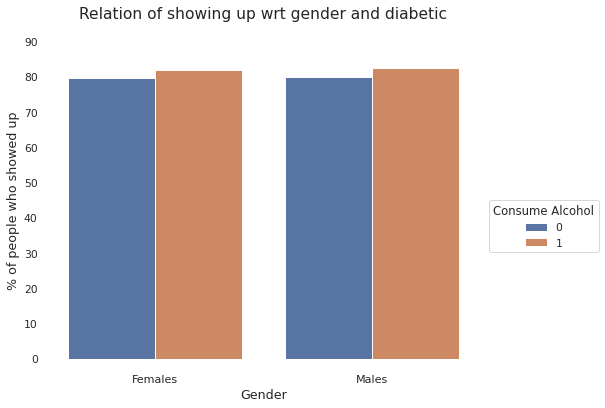

In [300]:
rel_with_gender(_feature='diabetes',_title='Relation of showing up wrt gender and diabetic\n')

### Relation of showing up wrt gender and hypertension

In [51]:
gender_hypertension = pd.pivot_table(data=df,index=['gender','hypertension'],values='show')
gender_hypertension

show
gender hypertension          
F      0             0.788768
       1             0.826781
M      0             0.794929
       1             0.827453

> There is an increase of show-up rate with males and females who have hypertension

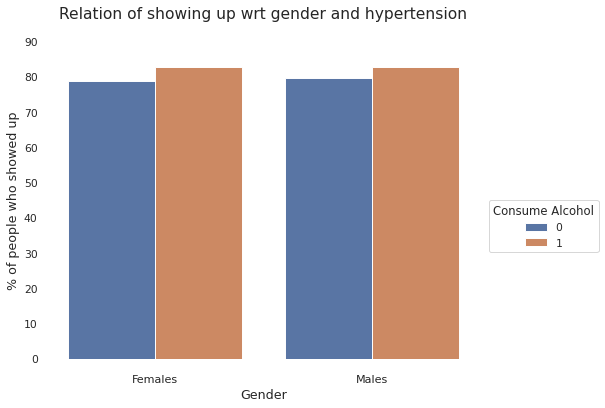

In [301]:
rel_with_gender(_feature='hypertension',_title='Relation of showing up wrt gender and hypertension\n')

### Relation of showing up wrt gender and scholarship

In [87]:
gender_scholar = pd.pivot_table(data=df,index=['gender','scholarship'],values='show')
gender_scholar

show
gender scholarship          
F      0            0.801772
       1            0.762115
M      0            0.802301
       1            0.764940

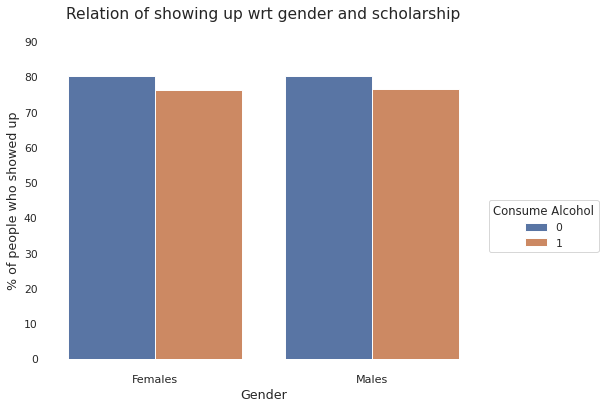

In [302]:
rel_with_gender(_feature='scholarship',_title='Relation of showing up wrt gender and scholarship\n')

# Limitations


>Appointment Time in all the rows is same that is 00:00:00.
>>If appointment time was specified properly then we could have 
find time intervals over which people prefer to miss scheduled appointment

> Handicap section has five different values(0,1,2,3,4) but on Kaggle author describes it as column with boolean values where 0 represents person with no-handicap and 1 with handicap.
>> We have assumed that 1,2,3,4 are handicaps and changed them all to 1 to represent person with handicap. While 0 represents person with no handicap.